# Principle Component Analysis

## 1. Einleitung
Dieses Jupyter Notebook stellt eine Ergänzug zu der wissenschaftlichen Arbeit über die Principle Component Analysis dar. Der prinzipielle Aufbau des Notebooks ist daher gleich mit dem der Arbeit.

## 2. Mathematische Grundlagen 
Nachfolgend werden die Grafiken erzeugt, die in der wissenschftlichen Arbeit verwendet wurden, um den Unterschied zwischen einer geringen und einer hohen Varainz zu veranschaulichen.

### 2.1 Standardabweichung und Varianz

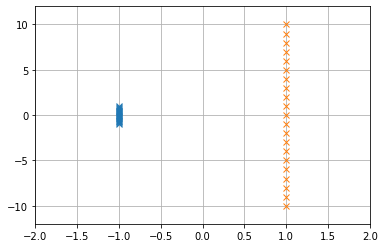

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Erstellen von Daten
X1 = np.arange(-1, 1.1, 0.1)
X2 = np.arange(-10, 11, 1)
Y1 = np.repeat(-1,len(X1))
Y2 = np.repeat(1,len(X2))

#Plotten von Daten
plt.plot(Y1, X1, 'x')
plt.plot(Y2, X2, 'x')

#Formatierung des Plots
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-12, 12)

#Speichern des Plots
plt.savefig('Figures/Std_Var.pdf')
plt.show()

### 2.2 Eigenwerte und Eigenvektoren


In [2]:
#Erstellen einer Matix


#Berechnung der Eigenwerte und Eigenvektoren


#Zeigen, dass Eigenvektoren rechtwicklig zueinader sind


## 3. Durchführung einer PCA

### 3.1 Standardisierung

Zuerst werden einige zufällige Daten generiert. Es werden 100 Beispiele mit je 3 Merkmalen generiert.
Daraufhin werden die Merkmale standardisiert indem der Mittelwert subtrahiert und durch die Standardabweichung geteilt wird.

In [3]:
X = np.random.rand(20, 5)
X = (X - X.mean()) / X.std()

### 3.2 Berechnung der Kovarianzmatrix

In [4]:
C = np.cov(X.T)

### 3.3 Berechnen der Eigenvektoren und Eigenwerte der Kovarianzmatrix 

Die Eigenwerte und Eigenvektoren werden berechnet und danach in absteigender Reihenfolge sortiert.

In [5]:
eigenvalues, eigenvectors = np.linalg.eig(C)
eigenvalues, eigenvectors = zip(*sorted(zip(eigenvalues, eigenvectors), key=lambda x: x[0], reverse=True))

### 3.4 Bilden eines Feature Vektors

Zur Durchführung der PCA muss die Anzahl der Komponenten angegeben werden die behalten werden sollen.

In [6]:
n_components = 5
feature_vector_matrix = eigenvectors[:n_components]

### 3.5 Umformen der Daten

Die Matrix aus den Feature Vektoren wird dann umgeformt auf die Achsen der neuen Hauptkomponenten.

In [7]:
X_pca_converted = X.dot(feature_vector_matrix)
print(X_pca_converted)

[[-0.26803395  0.08249074  0.24251627  0.18594684 -0.18550926]
 [ 0.25572637  0.0073176   1.14517797 -1.32952658  0.07880679]
 [ 0.42163443  0.04386576 -0.60032621 -1.18271797  0.81342841]
 [ 0.25804198  0.73516858 -0.61781789 -0.40925005  2.16311447]
 [ 0.60632749 -1.16746632  0.52944918  1.54914894  1.07889865]
 [-0.45591511 -0.81167766 -0.34886458  1.90052    -0.4657155 ]
 [ 0.22145018  0.44681262 -0.63074823  1.3825719   2.05850021]
 [-0.07795769 -1.65952604 -0.47134922 -0.39226997 -0.73322814]
 [-0.68045286 -2.28251886 -0.24473311 -0.9104284  -0.50782629]
 [ 0.13440053  1.55626678 -0.49471042  0.66993361 -0.96940279]
 [ 0.18618019  0.14150599 -1.80130633  0.8970832  -1.76240921]
 [-0.88611081  1.22671895 -0.85475366  1.67426746  1.04744728]
 [-0.90937879  1.24130787 -0.37457349  0.58227546 -1.96589624]
 [-0.18304815 -0.52413066  0.12432077 -0.6460618   1.16837217]
 [-0.02260135  1.51982256  1.93358142 -1.6411641   0.71003986]
 [ 1.67573493  0.85242591 -0.56278136  0.53750766 -0.38

In [8]:
pca_data = np.dot(X, eigenvectors)
print("Transformed data ", pca_data.shape)

Transformed data  (20, 5)


### 5.1 Dimensionsreduktion

Im folgenden wird ein bekanntes Beispiel einer Gesichtserkennung mit der ORL Datenbank das je 10 Bilder von 40 verschiedenen Personen beinhaltet bis zur Anwendung der PCA gezeigt.

Showing sample faces


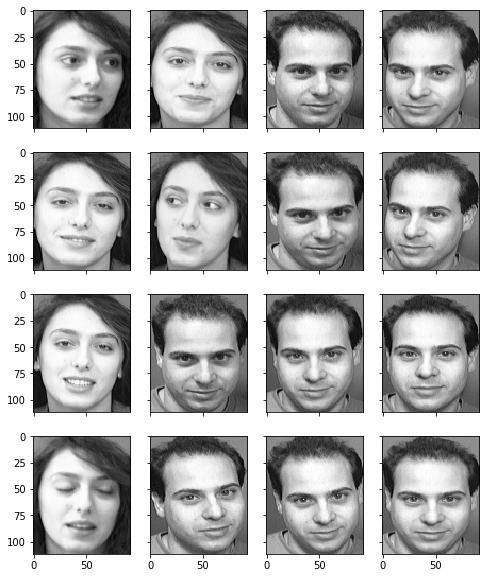

Face image shape: (112, 92)
Number of classes: 40
Number of images: 400
Shape of the weight matrix: (50, 389)
Best match s39 with Euclidean distance 1559.997137


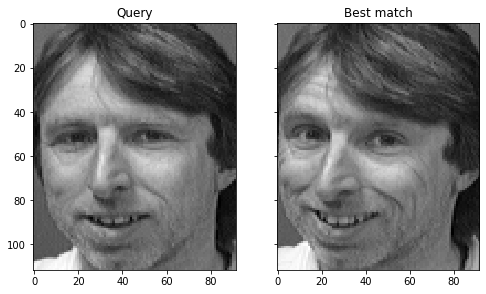

Best match s5 with Euclidean distance 2690.209330


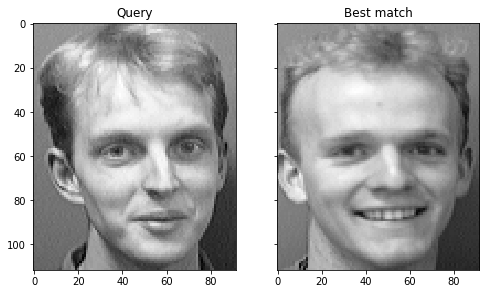

In [16]:
import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Read face image from zip file on the fly
faces = {}
with zipfile.ZipFile("C:/Users/num4abt/Downloads/archive1.zip") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith(".pgm"):
            continue # not a face picture
        with facezip.open(filename) as image:
            # If we extracted files from zip, we can use cv2.imread(filename) instead
            faces[filename] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_GRAYSCALE)

# Show sample faces using matplotlib
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
faceimages = list(faces.values())[-16:] # take last 16 images
for i in range(16):
    axes[i%4][i//4].imshow(faceimages[i], cmap="gray")
print("Showing sample faces")
plt.show()

# Print some details
faceshape = list(faces.values())[0].shape
print("Face image shape:", faceshape)

classes = set(filename.split("/")[0] for filename in faces.keys())
print("Number of classes:", len(classes))
print("Number of images:", len(faces))

# Take classes 1-39 for eigenfaces, keep entire class 40 and
# image 10 of class 39 as out-of-sample test
facematrix = []
facelabel = []
for key,val in faces.items():
    if key.startswith("s40/"):
        continue # this is our test set
    if key == "s39/10.pgm":
        continue # this is our test set
    facematrix.append(val.flatten())
    facelabel.append(key.split("/")[0])

# Create a NxM matrix with N images and M pixels per image
facematrix = np.array(facematrix)

# Apply PCA and take first K principal components as eigenfaces
pca = PCA().fit(facematrix)

n_components = 50
eigenfaces = pca.components_[:n_components]

# Show the first 16 eigenfaces
#fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
#for i in range(16):
#    axes[i%4][i//4].imshow(eigenfaces[i].reshape(faceshape), cmap="gray")
#print("Showing the eigenfaces")
#plt.show()

# Generate weights as a KxN matrix where K is the number of eigenfaces and N the number of samples
weights = eigenfaces @ (facematrix - pca.mean_).T
print("Shape of the weight matrix:", weights.shape)

# Test on out-of-sample image of existing class
query = faces["s39/10.pgm"].reshape(1,-1)
query_weight = eigenfaces @ (query - pca.mean_).T
euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
best_match = np.argmin(euclidean_distance)
print("Best match %s with Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))
# Visualize
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(query.reshape(faceshape), cmap="gray")
axes[0].set_title("Query")
axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
axes[1].set_title("Best match")
plt.show()

# Test on out-of-sample image of new class
query = faces["s40/1.pgm"].reshape(1,-1)
query_weight = eigenfaces @ (query - pca.mean_).T
euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
best_match = np.argmin(euclidean_distance)
print("Best match %s with Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))
# Visualize
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(query.reshape(faceshape), cmap="gray")
axes[0].set_title("Query")
axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
axes[1].set_title("Best match")
plt.show()